In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
# Bài tập 1 : Tạo function prepare_data(file_name_dataset) trả về dữ liệu đã được tổ chức (X cho input và y cho output)

def get_column(data, index):
    result = []
    for row in data:
        result.append(row[index])

    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y outpu for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [3]:
# Bài tập 2: function initialize_params() để khởi tạo ngẫu nhiên giá trị ban đầu cho w1, w2, w3 theo gaussian random.gauss(mu=0.0, sigma=0.01) và b = 0
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

# Khởi tạo funtion initialize_params () cố định wi, cũng như b
def inititalize_params_fixed():
    w1, w2, w3, b = (0.016992259082509283,
                     0.0070783670518262355,
                     -0.002307860847821344,
                     0)
    return w1, w2, w3, b

# function predict(x1, x2, x3, w1, w2, w3, b)
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

In [11]:
#  Dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức Mean Squared Error L = (ˆ y − y)2
def implement_linear_regression(X_data, y_data, epoch_max=50, lr= 1e-5):
    losses =[]

    w1, w2, w3, b = inititalize_params_fixed()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute outpu
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            d1_dw1 = compute_gradient_wi(x1, y, y_hat)
            d1_dw2 = compute_gradient_wi(x2, y, y_hat)
            d1_dw3 = compute_gradient_wi(x3, y, y_hat)
            d1_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight(w1, d1_dw1, lr)
            w2 = update_weight(w2, d1_dw2, lr)
            w3 = update_weight(w3, d1_dw3, lr)
            b = update_weight(b, d1_db, lr)

            # logging
            losses.append(loss)

    return w1, w2, w3, b, losses

y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [20]:
# function compute_loss(y_hat, y) để tính loss giữa kết quả dự đoán y_hat và giá trị thực y, sử dụng Mean Squared Error
def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2

def compute_loss_abs_mse(y, y_hat):
    return abs(y_hat - y)

l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [6]:
# function compute_gradient_wi(xi, y, y_hat)) để tính đạo hàm của hàm loss L = (ˆ y − y)2 theo wi và
# function compute_gradient_b(y, y_hat) để tính đạo hàm của hàm loss L= (ˆ y − y)2 theo b.
def compute_gradient_wi(xi, y, y_hat):
    return 2 * xi * (y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [36]:
# function update_weight_wi(wi, dl_dwi, lr) để cập nhật wi sau khi tính đạo làm hàm loss L theo wi
# function update_weight_b(b, dl_db, lr) để update bias (b) sau khi tính đạo làm hàm loss L theo b.
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

1.000005
0.50001


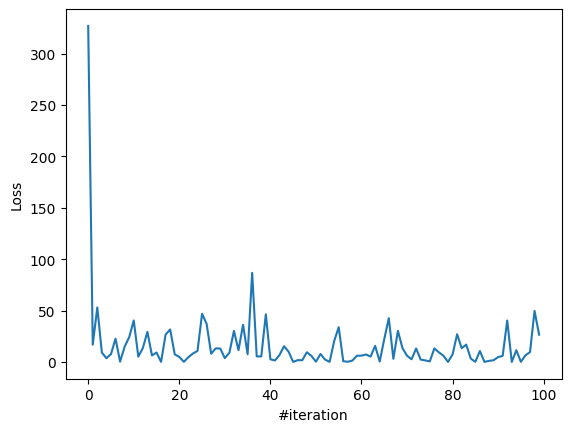

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [16]:
# hàm implement_linear_regression(X, y) và vẽ đồ thị kết quả cho 100 giá trị loss đầu tiên
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

print(w1, w2, w3)

In [15]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_repression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


0.5


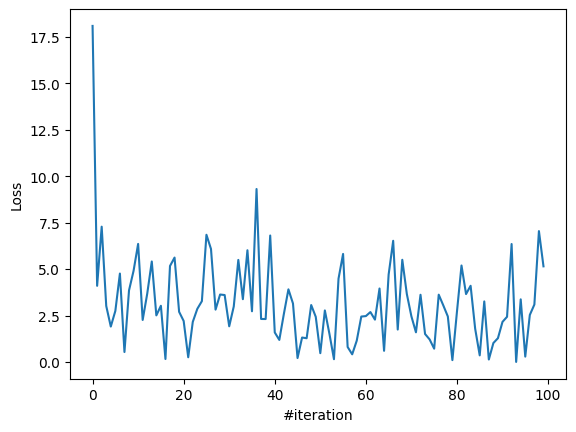

In [25]:
# huấn luyện data bằng cách thay thế hàm loss L = (ˆ y − y)2 bằng hàm loss MAE L = |yˆ − y| và vẽ đồ thị kết quả hàm loss trong 100 interation đầu tiên như bên hình 4
l = compute_loss_abs_mse(y_hat=1, y=0.5)
print(l)

#  Dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức Mean Squared Error L = (ˆ y − y)2
def implement_linear_regression_abs(X_data, y_data, epoch_max=50, lr= 1e-5):
    losses =[]

    w1, w2, w3, b = inititalize_params_fixed()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute outpu
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_abs_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            d1_dw1 = compute_gradient_wi(x1, y, y_hat)
            d1_dw2 = compute_gradient_wi(x2, y, y_hat)
            d1_dw3 = compute_gradient_wi(x3, y, y_hat)
            d1_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight(w1, d1_dw1, lr)
            w2 = update_weight(w2, d1_dw2, lr)
            w3 = update_weight(w3, d1_dw3, lr)
            b = update_weight(b, d1_db, lr)

            # logging
            losses.append(loss)

    return w1, w2, w3, b, losses

# hàm implement_linear_regression(X, y) và vẽ đồ thị kết quả cho 100 giá trị loss đầu tiên
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_abs(X, y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()


[236.4030687028686, 50.65777310938317, 21.150811598436565, 16.301062693015744, 15.347368324740579, 15.013842336887809, 14.783444799017046, 14.574434102660115, 14.373755468445431, 14.179196518428583, 13.990260378679277, 13.806725479338814, 13.628418172958604, 13.455176716909305, 13.286845453818458, 13.123273760983832, 12.964315756409599, 12.809830128261742, 12.659679987707719, 12.513732729233976, 12.371859895811767, 12.233937048381117, 12.099843639457221, 11.969462890719868, 11.842681674459124, 11.719390398755168, 11.599482896275038, 11.482856316571983, 11.369411021777124, 11.259050485576584, 11.151681195370605, 11.047212557514214, 10.945556805542564, 10.846628911286691, 10.750346498788854, 10.656629760928931, 10.565401378676802, 10.47658644288769, 10.390112378560444, 10.305908871481304, 10.223907797177628, 10.144043152109202, 10.066250987026354, 9.990469342426714, 9.91663818604445, 9.844699352307973, 9.774596483704153, 9.706274973988762, 9.63968191318522, 9.5747660343152, 9.51147766180

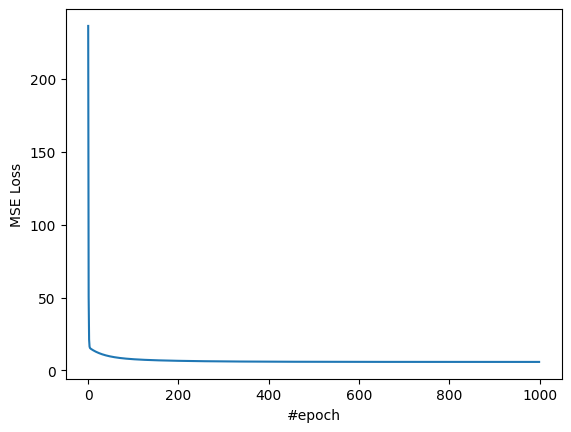

In [55]:
# Bài tập 3 (kỹ thuật huấn luyện data dùng batch N samples - linear regression
def implement_linear_regression_nsamples_mae(X_data, y_data, epoch_max=50, lr= 1e-5):
    losses =[]

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)

    return w1, w2, w3, b, losses

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X, y, 1000)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

In [58]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)

0.06711648132029782 0.15733782847610375 0.029740907797417334


[17.61612009049089, 7.844811083240359, 4.137611904563919, 3.242632273451099, 3.0667539281511504, 3.019013625111583, 3.0015816290053294, 2.9856536729525334, 2.9700472319039646, 2.9546417543307837, 2.9396334392892967, 2.924832236085803, 2.9102335704527307, 2.895833791267216, 2.881629642938123, 2.8676180553725485, 2.8537960600972894, 2.840160756498272, 2.826709297974743, 2.8134388860107333, 2.8005827076729326, 2.7882524017825663, 2.776086368511538, 2.7642603401587422, 2.7526115397992608, 2.741116545059051, 2.7300625737721522, 2.7192038194926744, 2.7084884141048655, 2.6979141908376265, 2.6874790169194336, 2.677180793039004, 2.667017452815075, 2.6569869622748303, 2.647447919751114, 2.6383375139567913, 2.6293424567500403, 2.6204615363853576, 2.6118908459655303, 2.6036280427610934, 2.595468374163876, 2.587483134178713, 2.57965181759172, 2.5719174522811756, 2.5642786020130024, 2.5567338529724593, 2.5492818134095416, 2.541921113290012, 2.5347593247651394, 2.5277487960336513, 2.52094398407211, 2

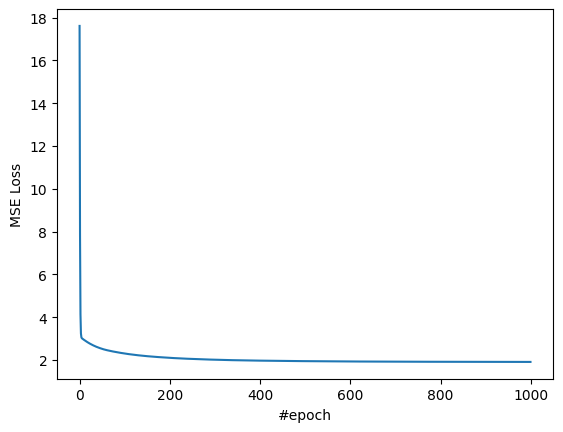

In [56]:
# Bài tập 3 (kỹ thuật huấn luyện data dùng batch N samples - linear regression
def implement_linear_regression_nsamples_mse(X_data, y_data, epoch_max=50, lr= 1e-5):
    losses =[]

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_abs_mse(y, y_hat)
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)

    return w1, w2, w3, b, losses

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mse(X, y, 1000)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


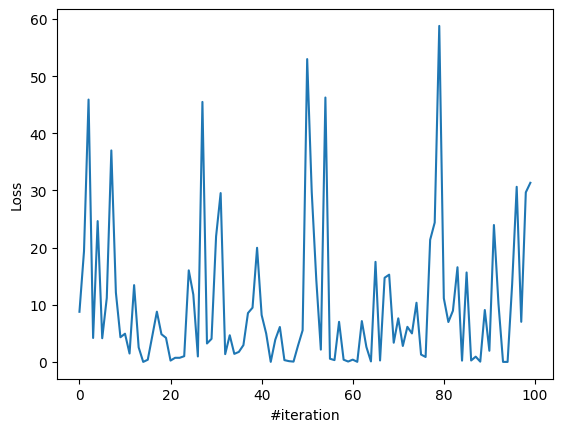

In [64]:
# Bài tập 4 Như chúng ta đã biết, mục đích của linear regression là tìm hàm xấp xỉ y = ax1 + bx2 +cx3 + bx0.
# Trong đó x1 là TV, x2 là Radio, x3 là Newspapers, và x0 = 1.
# Đầu tiên, bạn cần tổ chức lại dữ liệu đầu vào ở bài tập 1 theo dạng danh sách các feature (x0, x1, x2, x3).
# Ví dụ theo hình 1, dữ liệu đầu vào dòng thứ 1 và 2 ta có thể tổ chức lại như sau:
# X[0] = [1, x1, x2, x3] = [1, 230.1, 37.8, 69.2]
# X[1] = [1, x1, x2, x3] = [1, 44.5, 39.3, 45.1]
# ....
# X[199] = [1, x1, x2, x3] = [1, 232.1, 8.6, 8,7]

def prepare_data4(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y outpu for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

def initialize_params4():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

# predict output by using y =x0*b + x1*w1 + x2*w2 + x3*w3
def predict4(X_features, weights):
    return sum([f*w for f, w in zip(X_features, weights)])

def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2

# compute gradient
def compute_gradient_w4(X_features, y, y_hat):
    dl_dweights = [2*xi*(y_hat-y) for xi in X_features]
    return dl_dweights

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

# update weights
def update_weight4(weights, dl_dweights, lr):
    weights = [w-(lr*dw) for w, dw in zip(weights, dl_dweights)]
    return weights

def implement_linear_regression4(X_feature, y_ouput, epoch_max=50, lr= 1e-5):
    losses =[]
    weights = initialize_params4()
    N = len(y_ouput)

    for epoch in range(epoch_max):
        print('epoch', epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute outpu
            y_hat = predict4(features_i, weights)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w4(features_i, y, y_hat)

            # update parameters
            weights = update_weight4(weights, dl_dweights, lr)

            # logging
            losses.append(loss)

    return weights, losses

X, y = prepare_data4('advertising.csv')
W, L = implement_linear_regression4(X, y)
plt.plot(L[-100:])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()


In [65]:
X, y = prepare_data4('advertising.csv')
W, L = implement_linear_regression4(X, y, epoch_max=50, lr=1e-5)
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
